>>> # RandomForestClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
import os
# from sklearn.ensemble import RandomForestRegressor
print('libraries has imported !!')

libraries has imported !!


In [8]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df=df.drop(columns=['deck'],axis=1)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

In [12]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [39]:
df[df['age']== 0.420000]    # this records is very bad because i do not know age  0.420000 so i will remove these records

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False


In [13]:
df=df.drop(index=803,axis=0)

In [14]:
df['age'].describe()

count    713.000000
mean      29.740182
std       14.495164
min        0.670000
25%       20.500000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [15]:
df[(df['age']>0) & (df['age']<1)]   # i will remove all these records i do not want that records which age contain less that 1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False


In [16]:
df[(df['age']>0) & (df['age']<1)].index

Int64Index([78, 305, 469, 644, 755, 831], dtype='int64')

In [17]:
df=df.drop(index=[78, 305, 469, 644, 755, 831],axis=0)

In [18]:
df.shape

(884, 14)

In [19]:
df[(df['age']>0) & (df['age']<1)]  # you can see now i has remove that records was containing less than 0 age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [20]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

## fill the mean value in age columns instead of nun value

In [21]:
df['age']=df['age'].fillna(df['age'].mean())

In [22]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

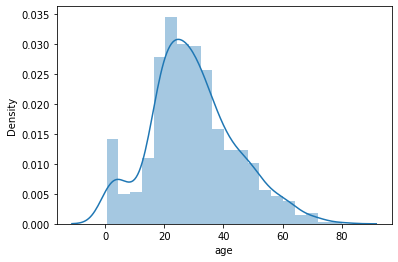

In [37]:
sns.distplot(df['age'])   

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

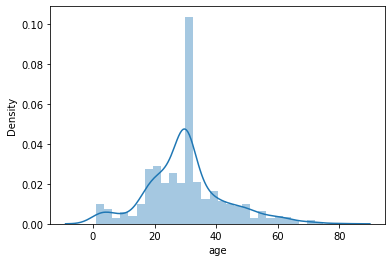

In [56]:
sns.distplot(df['age'])         # 

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

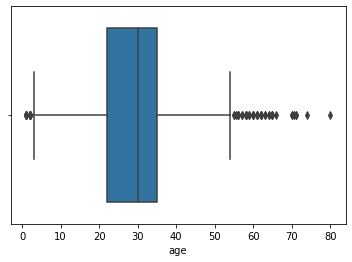

In [57]:
sns.boxplot(df['age'])    # you can see now i have many outliers present in my age column
# and now i will remove the all outiers

In [23]:
q1,q3=df['age'].quantile([.25,.75])
IQR=q3-q1
LL =q1-1.5*(IQR)
UL =q3+1.5*(IQR)

In [24]:
LL ,UL

(2.5, 54.5)

In [25]:
UL

54.5

In [26]:
df[df['age']>UL].shape   # i have 42 outliers available in my age columns
# and this is very harmfull for ML model so i will remove all that records

(42, 14)

In [27]:
df=df.drop(index=df[df['age']>UL].index,axis=0)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

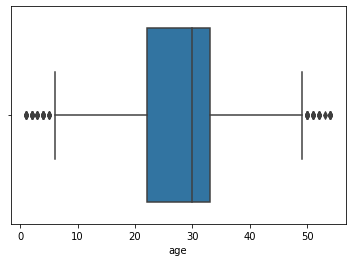

In [28]:
sns.boxplot(df['age'])          # now i has removed the outlers
# and you can see now my feature has been balanced 

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

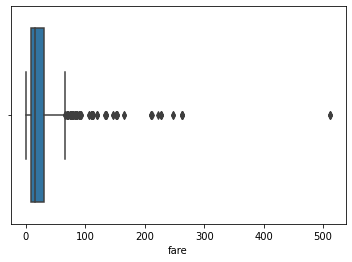

In [62]:
sns.boxplot(df['fare'])       # this is really very bad column for ML MODEL bcz this is imbalanced column

In [72]:
df['embark_town'].value_counts()

Southampton    613
Cherbourg      154
Queenstown      74
Name: embark_town, dtype: int64

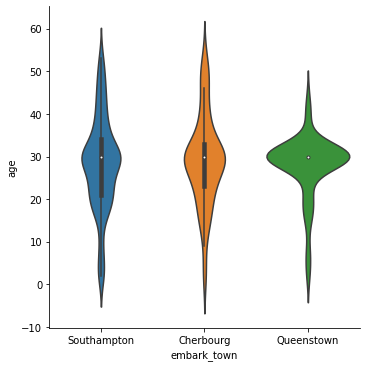

In [76]:
sns.catplot(x='embark_town',y='age',data=df,kind='violin')  

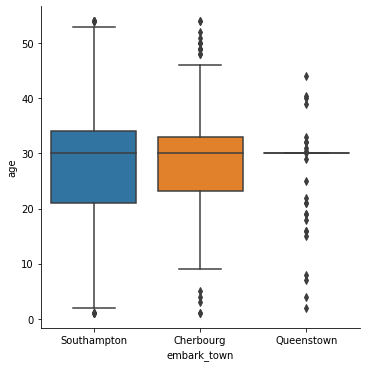

In [77]:
sns.catplot(x='embark_town',y='age',data=df,kind='box')

In [29]:
df[df['embark_town']=='Queenstown'].shape

(74, 14)

## and now i will dicided what columns will be required for ML model

In [30]:
df2=df[['pclass','sex','age','sibsp','parch','embarked','embark_town','survived']]
df2.head()

,pclass,sex,age,sibsp,parch,embarked,embark_town,survived
0,3,male,22.0,1,0,S,Southampton,0
1,1,female,38.0,1,0,C,Cherbourg,1
2,3,female,26.0,0,0,S,Southampton,1
3,1,female,35.0,1,0,S,Southampton,1
4,3,male,35.0,0,0,S,Southampton,0


## i will use labelencoding method by using pandas

In [31]:
df3=pd.get_dummies(df2)
df3.head()

,pclass,age,sibsp,parch,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1,0,0,1


In [74]:
df3.shape

(842, 13)

In [71]:
df3['pclass'].value_counts()

3    481
1    188
2    173
Name: pclass, dtype: int64

In [72]:
df3['age'].describe()

count    842.000000
mean      28.388951
std       10.794791
min        1.000000
25%       22.000000
50%       29.985856
75%       33.000000
max       54.000000
Name: age, dtype: float64

In [73]:
df3.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'survived', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

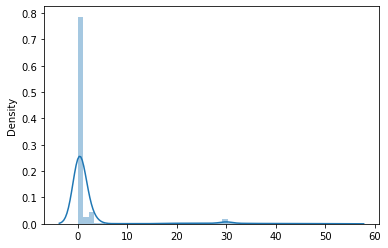

In [32]:
sns.distplot(df3)

## and now we my dataset is ready for building ml model

In [33]:
x=df3.drop('survived',axis=1)
y=df3[['survived']]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=31)

## i will chek the percentage only one column

In [36]:
x_train.shape[0]/x.shape[0]*100
# you can see now i have 90% perc.. data available in my trainin set

89.90498812351544

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfr=RandomForestClassifier(n_estimators=100,criterion='gini')         # voating process

In [40]:
rfr.fit(x_train,y_train)

<ipython-input-40-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestClassifier()

## i got  good accuracy 😁😁😁

In [41]:
rfr.score(x_test,y_test).round(2)*100     # it is good score

82.0

## and now again we will change some parameter value 

# AGain STarted 😉😉

In [42]:
rfr2=RandomForestClassifier(n_estimators=200)

In [43]:
rfr2.fit(x_train,y_train)

<ipython-input-43-5cfc4dfe4ade>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2.fit(x_train,y_train)


RandomForestClassifier(n_estimators=200)

In [44]:
rfr2.score(x_test,y_test).round(2)*100

82.0

# AGain some changes in parameters

In [45]:
rfr3=RandomForestClassifier(n_estimators=200,criterion="entropy")

In [46]:
rfr3.fit(x_train,y_train)

<ipython-input-46-6ba6721ca542>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr3.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [47]:
rfr3.score(x_test,y_test).round(2)*100      # no impact on my accuracy of data model

82.0

# AGain Some changes

In [48]:
rfr4=RandomForestClassifier(n_estimators=50,criterion="gini")

In [49]:
rfr4.fit(x_train,y_train)

<ipython-input-49-b2bee0d0c476>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr4.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

# superb i improved accuracy of my MODEL 😁😁

In [50]:
rfr4.score(x_test,y_test).round(2)*100

84.0

## confusion matrix score

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
y_pred=rfr4.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred)

array([[44,  3],
       [11, 27]], dtype=int64)

In [54]:
(44+27)/(44+27+3+11)

0.8352941176470589

## mean squared and root mean squared error

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test,y_pred).round(2)    # it is good accuracy 

0.16

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred)).round(2)           #ROot mean Squared erro

0.41

# Thank you 🌹😉🌹

# SAVE THE MODEL

In [58]:
import joblib

In [59]:
joblib.dump(rfr4,'titanic_model_save_with_84%_accuracy')

['titanic_model_save_with_84%_accuracy']

In [2]:
import os

In [60]:
path=os.getcwd()
model_path=path+'\\titanic_model_save_with_84%_accuracy'
model_path

'A:\\Data Scientist\\machine_learning\\titanic project\\titanic_model_save_with_84%_accuracy'

In [61]:
model=joblib.load(model_path)

In [62]:
model.n_features_in_

12

In [63]:
model.n_features_

12

In [64]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [65]:
y_test['survived'].values

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

## and now we will create a dataframe for better understanding

In [66]:
dit={'ACTUAL_VALUE':[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    'PREDICTED_VALUE':[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]}

In [67]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [68]:
check_dataset=pd.DataFrame(dit)
check_dataset

,ACTUAL_VALUE,PREDICTED_VALUE
0,1,1
1,1,0
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [69]:
check_dataset['ACTUAL_VALUE'].value_counts()

0    47
1    38
Name: ACTUAL_VALUE, dtype: int64

In [70]:
check_dataset['PREDICTED_VALUE'].value_counts()

0    55
1    30
Name: PREDICTED_VALUE, dtype: int64